In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder='../datasets'
filename='gold-prices.csv'

In [3]:
import csv
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )

time_series = []
with open(f"{folder}/{filename}", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        for x in row:
            try:
                time_series.append(locale.atof((x)))
            except ValueError:
                print(x)
                pass
            
print(time_series[:10], time_series[-10:])

[226.0, 226.0, 226.8, 218.6, 223.2, 225.5, 223.1, 224.0, 220.7, 220.7] [1503.8, 1533.0, 1537.2, 1540.2, 1528.4, 1526.0, 1537.9, 1546.1, 1529.1, 1523.7]


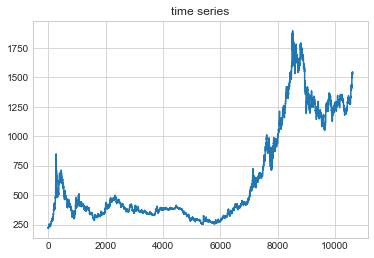

In [4]:
plt.style.use('seaborn-whitegrid')
plt.title("time series")
plt.plot(time_series)
plt.show()

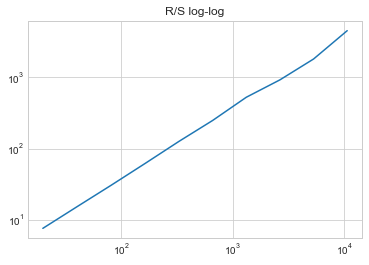

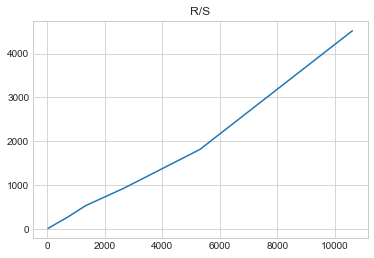

In [5]:
def RdivS(s_time_series):
    mean = 1.0*sum(s_time_series)/len(s_time_series)
    _Yt = [x - mean for x in s_time_series]
    _Zt = np.cumsum(_Yt).tolist()
    _R = max(_Zt) - min(_Zt)
    _S = float(pd.DataFrame(s_time_series).std())
    return _R/_S

def RdivS_by_slice(full_time_series, num_slices):
    rc = []
    slice_size = int(len(full_time_series)/num_slices)
    
    assert slice_size > 10
    
    for i in range(num_slices):
        result = RdivS(full_time_series[i*slice_size:(i+1)*slice_size])
        rc.append(result)
    
    return 1.0*sum(rc)/len(rc), slice_size

rs = []
size = []
for i in range(40):
    try:
        rs_, size_ = RdivS_by_slice(time_series, 2**i)
        rs.append(float(rs_))
        size.append(size_)
    except AssertionError:
        break


plt.plot(size, rs)
plt.xscale("log")
plt.yscale("log")
plt.title("R/S log-log")
plt.show()

plt.plot(size, rs)
plt.title("R/S")
plt.show()

In [6]:
from scipy import stats
from math import log
slope, intercept, r_value, p_value, std_err = stats.linregress( [log(x, 2) for x in size], [log(x, 2) for x in rs])

print(f"slope:{slope},intercept:{intercept},r_value:{r_value},p_value={p_value},std_err={std_err}")


slope:1.0001301689990132,intercept:-1.4061224959160281,r_value:0.999572324427816,p_value=1.462894259403468e-13,std_err=0.010344823672130693
